In [2]:
import pandas as pd
import pickle

In [3]:
with open('algebra_students_10plus_problem_types.pkl', 'r') as picklefile:
   algebra_students_10plus_problem_types = pickle.load(picklefile)

In [7]:
algebra_students_10plus_problem_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, _ajacoby_idPropertyLvl1 to xGameMasterProduct
Columns: 6808 entries, 9842 to 184758
dtypes: float64(6808)
memory usage: 7.4+ MB


In [6]:
algebra_students_10plus_problem_types.head()

Student_ID,9842,23552,23689,24037,24051,24155,24164,24286,24289,25301,...,179383,179442,179447,179766,180184,180188,180270,182719,182722,184758
Problem_Type,,,,,,,,,,,,,,,,,,,,,
_ajacoby_idPropertyLvl1,NaN,NaN,NaN,1,NaN,NaN,NaN,0.500000,NaN,NaN,...,0.333333,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_ajacoby_idPropertyLvl2,NaN,NaN,NaN,1,NaN,NaN,NaN,0.448276,NaN,NaN,...,0.363636,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_bmueller_ptWordProblems,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_bmueller_quadFactoredToStandard,-1,0,NaN,NaN,NaN,0.421053,0.363636,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
_bmueller_quadInterceptCoefficients,NaN,NaN,NaN,NaN,NaN,0.300000,0.428571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from scipy.spatial.distance import euclidean

In [12]:
test_subset = algebra_students_10plus_problem_types[algebra_students_10plus_problem_types.columns[:50]]

In [1]:
# for index, student in enumerate(test_subset.columns):
#     print index, student

In [17]:
u=[1,2,3]
v=[2,4,6]
euclidean(u,v)

3.7416573867739413

In [31]:
studentA = 42503
studentB = 42487

In [32]:
u = test_subset[studentA]
v = test_subset[studentB]

In [33]:
uv = pd.DataFrame([u,v])
uv = uv.dropna(axis=1)

In [34]:
uv

Problem_Type,_ajacoby_idPropertyLvl1,_ajacoby_idPropertyLvl2,_jhall_AbsValFunc2,_jhall_SquRootFun2,_jhall_SquRootFunc,combineLikeTerms,literalOneStepLevel1,multiplyBinomials,multiplyPolynomialsLevel1,multiplyPolynomialsLevel2,multiplyPolynomialsLevel3
42503,1,0.500000,0.750000,0.863636,0.826087,0.666667,0.571429,1,0.500000,1,1.0
42487,1,0.833333,0.818182,0.909091,0.909091,0.714286,0.714286,1,0.833333,1,0.5


In [35]:
uv.ix[studentA]

Problem_Type
_ajacoby_idPropertyLvl1      1.000000
_ajacoby_idPropertyLvl2      0.500000
_jhall_AbsValFunc2           0.750000
_jhall_SquRootFun2           0.863636
_jhall_SquRootFunc           0.826087
combineLikeTerms             0.666667
literalOneStepLevel1         0.571429
multiplyBinomials            1.000000
multiplyPolynomialsLevel1    0.500000
multiplyPolynomialsLevel2    1.000000
multiplyPolynomialsLevel3    1.000000
Name: 42503, dtype: float64

In [36]:
euclidean(uv.ix[studentA],uv.ix[studentB])

0.713093606309043

In [37]:
len(uv.columns)

11

In [2]:
#Test of first 50 users
euc_dict = {}
for index, studentA in enumerate(test_subset.columns):
    studentA_data = test_subset[studentA]
    studentA_dict = {}
    for studentB in test_subset.columns[index:]:
        if studentA==studentB:
            studentA_dict[studentB] = 0
            continue
        studentB_data = test_subset[studentB]
        AB = pd.DataFrame([studentA_data , studentB_data])
        AB = AB.dropna(axis=1)
        num_matches = len(AB.columns)
        print num_matches
        if num_matches == 0:
            studentA_dict[studentB] = 100
        elif num_matches >= 5:
            distance = euclidean(AB.ix[studentA] , AB.ix[studentB])
        else:
            distance = euclidean(AB.ix[studentA] , AB.ix[studentB])*(5.0/num_matches)
        studentA_dict[studentB] = distance
    euc_dict[studentA] = studentA_dict
        
        

In [49]:
test_euc_matrix = pd.DataFrame.from_dict(euc_dict)
test_euc_matrix.head()

,9842,23552,23689,24037,24051,24155,24164,24286,24289,25301,...,40757,40940,41058,41199,41275,41429,42473,42486,42487,42503
9842,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23552,2.945609,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23689,2.626263,3.141894,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24037,3.760729,3.062718,5.543389,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24051,3.326989,3.025823,8.750000,1.315354,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#Test of first 50 users
def euc_matrix():
    euc_dict = {}
    for index, studentA in enumerate(test_subset.columns):
        studentA_data = test_subset[studentA]
        studentA_dict = {}
        for studentB in test_subset.columns[index:]:
            if studentA==studentB:
                studentA_dict[studentB] = 0
                continue
            studentB_data = test_subset[studentB]
            AB = pd.DataFrame([studentA_data , studentB_data])
            AB = AB.dropna(axis=1)
            num_matches = len(AB.columns)
            if num_matches == 0:
                studentA_dict[studentB] = 100
            elif num_matches >= 5:
                distance = euclidean(AB.ix[studentA] , AB.ix[studentB])
            else:
                distance = euclidean(AB.ix[studentA] , AB.ix[studentB])*(5.0/num_matches)
            studentA_dict[studentB] = distance
        euc_dict[studentA] = studentA_dict
    return euc_dict
        

In [63]:
%timeit euc_matrix()

1 loops, best of 3: 5.57 s per loop


In [62]:
len(euc_dict)

50

In [68]:
(5.57/((50*50)/2.0))

0.004456

In [72]:
((6808**2)/2.0)*((5.57/((50*50)/2.0)))/3600.0

28.68479694222222

In [73]:
#Test of first 50 users
def euc_matrix(df):
    euc_dict = {}
    for index, studentA in enumerate(df.columns):
        studentA_data = df[studentA]
        studentA_dict = {}
        for studentB in df.columns[index:]:
            if studentA==studentB:
                studentA_dict[studentB] = 0
                continue
            studentB_data = df[studentB]
            AB = pd.DataFrame([studentA_data , studentB_data])
            AB = AB.dropna(axis=1)
            num_matches = len(AB.columns)
            if num_matches == 0:
                studentA_dict[studentB] = 100
            elif num_matches >= 5:
                distance = euclidean(AB.ix[studentA] , AB.ix[studentB])
            else:
                distance = euclidean(AB.ix[studentA] , AB.ix[studentB])*(5.0/num_matches)
            studentA_dict[studentB] = distance
        euc_dict[studentA] = studentA_dict
    return euc_dict
        

In [74]:
%timeit euc_matrix(test_subset)

1 loops, best of 3: 6.08 s per loop


In [75]:
5000**0.5

70.71067811865476

In [76]:
70**2

4900

In [77]:
test_subset2 = algebra_students_10plus_problem_types[algebra_students_10plus_problem_types.columns[:70]]

In [78]:
%timeit euc_matrix(test_subset2)

1 loops, best of 3: 12 s per loop


In [83]:
algebra_students_10plus_problem_types.head()

Student_ID,9842,23552,23689,24037,24051,24155,24164,24286,24289,25301,...,179383,179442,179447,179766,180184,180188,180270,182719,182722,184758
Problem_Type,,,,,,,,,,,,,,,,,,,,,
_ajacoby_idPropertyLvl1,NaN,NaN,NaN,1,NaN,NaN,NaN,0.500000,NaN,NaN,...,0.333333,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_ajacoby_idPropertyLvl2,NaN,NaN,NaN,1,NaN,NaN,NaN,0.448276,NaN,NaN,...,0.363636,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_bmueller_ptWordProblems,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_bmueller_quadFactoredToStandard,-1,0,NaN,NaN,NaN,0.421053,0.363636,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
_bmueller_quadInterceptCoefficients,NaN,NaN,NaN,NaN,NaN,0.300000,0.428571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
def user_neighbors(user, df):
    studentA = user
    studentA_data = df[user]
    studentA_dict = {}
    for studentB in df.columns:
        if studentA==studentB:
            continue
        studentB_data = df[studentB]
        AB = pd.DataFrame([studentA_data , studentB_data])
        AB = AB.dropna(axis=1)
        num_matches = len(AB.columns)
        if num_matches == 0 or num_matches==1:
            continue
        elif num_matches >= 5:
            distance = euclidean(AB.ix[studentA] , AB.ix[studentB])
            studentA_dict[studentB] = distance
        else:
            continue
#             distance = euclidean(AB.ix[studentA] , AB.ix[studentB])*(5.0/num_matches)
    return sorted(studentA_dict.iteritems(), key =lambda x: x[1])[:10]

In [176]:
neighbors24051 = user_neighbors(24051, algebra_students_10plus_problem_types)

In [177]:
neighbors24051

[(137143, 0.14962159374633316),
 (133317, 0.17437936593905284),
 (133692, 0.1830238575331201),
 (133664, 0.1920913662050471),
 (147303, 0.20203050891044222),
 (77079, 0.2118713598481129),
 (141146, 0.2147661428035951),
 (162762, 0.22208309066329537),
 (136846, 0.23202550935227498),
 (112056, 0.2474358296526967)]

In [179]:
for neighbor in neighbors24051:
    print neighbor[1]

0.149621593746
0.174379365939
0.183023857533
0.192091366205
0.20203050891
0.211871359848
0.214766142804
0.222083090663
0.232025509352
0.247435829653


In [130]:
weights = [value[1] for value in neighbors24051]

In [131]:
weights

[0.14962159374633316,
 0.17437936593905284,
 0.1830238575331201,
 0.1920913662050471,
 0.20203050891044222,
 0.2118713598481129,
 0.2147661428035951,
 0.22208309066329537,
 0.23202550935227498,
 0.2474358296526967]

In [140]:
(avg, total, items) = (0,0,0)

In [141]:
avg

0

In [142]:
total

0

In [183]:
## Refine for definition.. 

def recommendation(user,df):
    # first find nearest neighbor
    nearest10 = user_neighbors(user, df)
    recommendations = {}
    userRatings = df[user]
    # now find bands neighbor rated that user didn't
    for neighbor in nearest10:
        neighbor_name = neighbor[0]
        neighbor_dist = neighbor[1]
        neighborRatings = df[neighbor_name]
        for question in neighborRatings.index:
            #Don't recommend problems user has done....**this needs to be updated; user needs to practice too...
            #Currently simple average...should be weighted based on distance
            if np.isnan(userRatings[question]) and np.isnan(neighborRatings[question])==False: 
                (avg, total, items) = recommendations.get(question, (0,0,0))
                items +=1
                total +=neighborRatings[question]
                avg = total/items
                recommendations[question] = (avg, total, items)
    return recommendations  

In [184]:
recommendations24051 = recommendation(24051, algebra_students_10plus_problem_types)

In [189]:
sorted([x for x in recommendations24051.iteritems() if x[1][-1]!=1], key = lambda x: x[1][0], reverse=True)

[('differencePerfectSquares', (0.95833333333333326, 1.9166666666666665, 2)),
 ('gcfFactorVariableOnly', (0.94871794871794879, 2.8461538461538463, 3)),
 ('commutativeAdditionGraphs', (0.9375, 3.75, 4)),
 ('parabolaAValue', (0.92307692307692302, 2.7692307692307692, 3)),
 ('solveTrinomialFactorA1', (0.87012987012987009, 4.3506493506493502, 5)),
 ('linearSystemGraphicallyL1', (0.86878787878787878, 4.3439393939393938, 5)),
 ('graphingLines', (0.86376623376623374, 8.6376623376623378, 10)),
 ('linearSystemGraphically', (0.85317460317460314, 2.5595238095238093, 3)),
 ('_bmueller_quadInterceptCoefficients',
  (0.85164835164835162, 1.7032967032967032, 2)),
 ('lineFromPointSlope', (0.84210526315789469, 2.5263157894736841, 3)),
 ('solveTrinomialFactorA23456', (0.8214285714285714, 4.1071428571428568, 5)),
 ('averageRateOfChangeTable', (0.81759834368530016, 2.4527950310559006, 3)),
 ('gcfBinomial3', (0.81127450980392157, 1.6225490196078431, 2)),
 ('solveQuadraticFactoring', (0.79717948717948706, 3.9

In [185]:
recommendations137143 = recommendation(137143, algebra_students_10plus_problem_types)

In [199]:
q_difficulty = algebra_students_10plus_problem_types.mean(axis=1)

In [202]:
q_difficulty = q_difficulty.reset_index()
q_difficulty.columns = ['Problem_Type','Mean']
q_difficulty.head()

,Problem_Type,Mean
0,_ajacoby_idPropertyLvl1,0.586922
1,_ajacoby_idPropertyLvl2,0.507386
2,_bmueller_ptWordProblems,0.594412
3,_bmueller_quadFactoredToStandard,0.306127
4,_bmueller_quadInterceptCoefficients,0.478771


In [205]:
q_difficulty['Difficulty'] = 1-q_difficulty.Mean

In [3]:
# q_difficulty.sort_index(by='Mean')

In [213]:
q10plus = algebra_students_10plus_problem_types[algebra_students_10plus_problem_types.count(axis=1)>10]

In [214]:
q_difficulty2 = q10plus.mean(axis=1)
q_difficulty2 = q_difficulty2.reset_index()
q_difficulty2.columns = ['Problem_Type','Mean']
q_difficulty2.head()

,Problem_Type,Mean
0,_ajacoby_idPropertyLvl1,0.586922
1,_ajacoby_idPropertyLvl2,0.507386
2,_bmueller_ptWordProblems,0.594412
3,_bmueller_quadFactoredToStandard,0.306127
4,_bmueller_quadInterceptCoefficients,0.478771


In [297]:
q_difficulty2['Difficulty'] = 1-q_difficulty2.Mean

In [299]:
q_difficulty2.sort_index(by='Mean').head(10)

,Problem_Type,Mean,Difficulty
87,percentChangeExpressions,-0.288737,1.288737
111,simplifyRadical,-0.118128,1.118128
88,percentChangeTwoValues,-0.107544,1.107544
123,trigFindSideA1,-0.080833,1.080833
56,graphQuadLinearSystem,-0.053704,1.053704
105,quadraticWordProblems,-0.030127,1.030127
106,rangeFromEquation,0.017609,0.982391
36,averageRateOfChangeEquation,0.056190,0.943810
12,_bpeled_masterProductFactoring,0.059010,0.940990
122,trigFindAngleA1,0.059270,0.940730


In [300]:
q_difficulty3 = q_difficulty2[q_difficulty2.Mean>0]

In [301]:
print len(q_difficulty)
print len(q_difficulty2)
print len(q_difficulty3)

142
130
124


In [310]:
round(3.2)

3.0

In [307]:
q_difficulty3.Difficulty=5*(1-q_difficulty3.Mean)

In [313]:
q_difficulty3.head()

,Problem_Type,Mean,Difficulty
0,_ajacoby_idPropertyLvl1,0.586922,2.065388
1,_ajacoby_idPropertyLvl2,0.507386,2.463069
2,_bmueller_ptWordProblems,0.594412,2.027938
3,_bmueller_quadFactoredToStandard,0.306127,3.469364
4,_bmueller_quadInterceptCoefficients,0.478771,2.606143


In [308]:
q_difficulty3.describe()

,Mean,Difficulty
count,124.000000,124.000000
mean,0.426826,2.865869
std,0.182725,0.913626
min,0.017609,0.948454
25%,0.305907,2.274158
50%,0.433045,2.834775
75%,0.545168,3.470467
max,0.810309,4.911956


In [319]:
np.random.choice(q_difficulty3.Problem_Type)

'solveLinearSystemElim'

In [311]:
pwd

u'/Users/matthewmitchell/Desktop/Delta_Math_Data'

In [312]:
cd Problem_Descriptions/

/Users/matthewmitchell/Desktop/Delta_Math_Data/Problem_Descriptions


In [314]:
q_difficulty3.to_csv('question_difficulty_sep14.csv')

In [327]:
questions = q_difficulty3

In [329]:
questions.head()

,Problem_Type,Mean,Difficulty
0,_ajacoby_idPropertyLvl1,0.586922,2.065388
1,_ajacoby_idPropertyLvl2,0.507386,2.463069
2,_bmueller_ptWordProblems,0.594412,2.027938
3,_bmueller_quadFactoredToStandard,0.306127,3.469364
4,_bmueller_quadInterceptCoefficients,0.478771,2.606143


In [333]:
len(questions[(questions.Difficulty<user_rating+0.5) & (questions.Difficulty>user_rating-0.5) ])

38

In [331]:
user_rating=2

In [324]:
np.random.choice(range(len(q_difficulty3)))

39

###KMeans on Questions

In [275]:
from sklearn.cluster import KMeans

In [278]:
KMeans?

In [219]:
algebra_students_10plus_problem_types.head()

Student_ID,9842,23552,23689,24037,24051,24155,24164,24286,24289,25301,...,179383,179442,179447,179766,180184,180188,180270,182719,182722,184758
Problem_Type,,,,,,,,,,,,,,,,,,,,,
_ajacoby_idPropertyLvl1,NaN,NaN,NaN,1,NaN,NaN,NaN,0.500000,NaN,NaN,...,0.333333,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_ajacoby_idPropertyLvl2,NaN,NaN,NaN,1,NaN,NaN,NaN,0.448276,NaN,NaN,...,0.363636,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_bmueller_ptWordProblems,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_bmueller_quadFactoredToStandard,-1,0,NaN,NaN,NaN,0.421053,0.363636,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
_bmueller_quadInterceptCoefficients,NaN,NaN,NaN,NaN,NaN,0.300000,0.428571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df = algebra_students_10plus_problem_types.transpose()

In [263]:
df.head()

Problem_Type,_ajacoby_idPropertyLvl1,_ajacoby_idPropertyLvl2,_bmueller_ptWordProblems,_bmueller_quadFactoredToStandard,_bmueller_quadInterceptCoefficients,_bmueller_quadStandardCoefficients,_bmueller_quadVertexCoefficients,_bmueller_quadVertexToStandard,_bmueller_rateOfChangeUnits,_bmueller_tableToEquation1,...,solveTrinomialFactorA23456,standardToSlopeIntForm,trigFindAngleA1,trigFindSideA1,vertexForm,writeLineEquation,xGameLevel1,xGameLevel2,xGameLevel3,xGameMasterProduct
Student_ID,,,,,,,,,,,,,,,,,,,,,
9842,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23552,NaN,NaN,NaN,0,NaN,0.545455,0.294118,0.75,NaN,-1,...,NaN,0.333333,NaN,NaN,NaN,0.75,NaN,NaN,NaN,NaN
23689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24037,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,0.60,NaN,NaN,NaN,NaN
24051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN


In [266]:
df = df.fillna(df.mean(axis=0))

In [267]:
df.head()

Problem_Type,_ajacoby_idPropertyLvl1,_ajacoby_idPropertyLvl2,_bmueller_ptWordProblems,_bmueller_quadFactoredToStandard,_bmueller_quadInterceptCoefficients,_bmueller_quadStandardCoefficients,_bmueller_quadVertexCoefficients,_bmueller_quadVertexToStandard,_bmueller_rateOfChangeUnits,_bmueller_tableToEquation1,...,solveTrinomialFactorA23456,standardToSlopeIntForm,trigFindAngleA1,trigFindSideA1,vertexForm,writeLineEquation,xGameLevel1,xGameLevel2,xGameLevel3,xGameMasterProduct
Student_ID,,,,,,,,,,,,,,,,,,,,,
9842,0.586922,0.507386,0.594412,-1.000000,0.478771,0.424498,0.468979,0.262753,0.425657,0.405235,...,0.499193,0.125000,0.05927,-0.080833,0.291134,0.514493,0.766741,0.638553,0.574799,0.142683
23552,0.586922,0.507386,0.594412,0.000000,0.478771,0.545455,0.294118,0.750000,0.425657,-1.000000,...,0.499193,0.333333,0.05927,-0.080833,0.291134,0.750000,0.766741,0.638553,0.574799,0.142683
23689,0.586922,0.507386,0.594412,0.306127,0.478771,0.424498,0.468979,0.262753,0.425657,0.405235,...,-0.500000,0.408613,0.05927,-0.080833,0.291134,0.514493,0.766741,0.638553,0.574799,0.142683
24037,1.000000,1.000000,0.594412,0.306127,0.478771,0.424498,0.468979,0.262753,0.425657,0.405235,...,0.499193,1.000000,0.05927,-0.080833,0.291134,0.600000,0.766741,0.638553,0.574799,0.142683
24051,0.586922,0.507386,0.594412,0.306127,0.478771,0.424498,0.468979,0.262753,0.425657,0.405235,...,0.499193,1.000000,0.05927,-0.080833,0.291134,1.000000,0.766741,0.638553,0.574799,0.142683


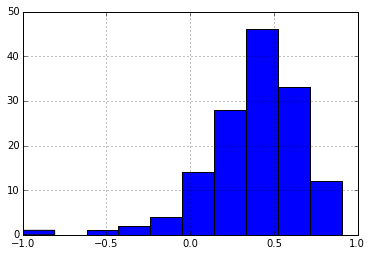

In [387]:
df.mean(axis=0).hist()

In [226]:
q_submissions = algebra_students_10plus_problem_types.count(axis=1)

In [4]:
# q_submissions

In [228]:
q_difficulty.head()

,Problem_Type,Mean,Difficulty
0,_ajacoby_idPropertyLvl1,0.586922,0.413078
1,_ajacoby_idPropertyLvl2,0.507386,0.492614
2,_bmueller_ptWordProblems,0.594412,0.405588
3,_bmueller_quadFactoredToStandard,0.306127,0.693873
4,_bmueller_quadInterceptCoefficients,0.478771,0.521229


In [229]:
q_difficulty['Submissions'] = q_submissions

In [234]:
q_data = q_difficulty.set_index('Problem_Type')

In [235]:
q_data['Submissions'] = q_submissions

In [236]:
q_data.head()

,Mean,Difficulty,Submissions
Problem_Type,,,
_ajacoby_idPropertyLvl1,0.586922,0.413078,1554
_ajacoby_idPropertyLvl2,0.507386,0.492614,1928
_bmueller_ptWordProblems,0.594412,0.405588,210
_bmueller_quadFactoredToStandard,0.306127,0.693873,585
_bmueller_quadInterceptCoefficients,0.478771,0.521229,542


In [248]:
%matplotlib inline

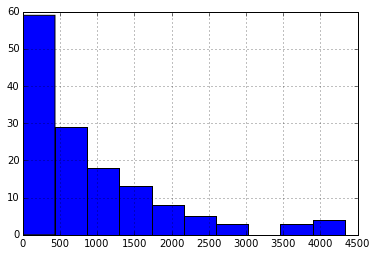

In [249]:
q_data.Submissions.hist()

In [250]:
len(q_data[q_data.Submissions>500])

76

In [388]:
q_data[(q_data.Difficulty>2)]

,Mean,Difficulty,Submissions
Problem_Type,,,


In [381]:
q_data.describe()

,Mean,Difficulty,Submissions
count,141.000000,141.000000,142.00000
mean,0.389226,0.610774,916.43662
std,0.269869,0.269869,994.34286
min,-1.000000,0.094444,0.00000
25%,0.264734,0.455640,187.00000
50%,0.424498,0.575502,584.00000
75%,0.544360,0.735266,1331.50000
max,0.905556,2.000000,4330.00000


In [5]:
# q_data.sort(columns='Submissions', ascending=False)

In [243]:
q_data.sort?

In [252]:
5 in range(10)

True

In [412]:
def Qslopefrompoints():
    x1 = np.random.randint(-10,10)
    x2 = np.random.randint(-10,10)
    y1 = np.random.randint(-10,10)
    y2 = np.random.randint(-10,10)
    q = 'Find the slope between (%s, %s) and (%s, %s).' %(x1,y1,x2,y2)
    a ='%s/%s'%((y2-y1),(x2-x1))
    return [q,a]

In [413]:
qas=[]
for i in range(50):
    qas.append(Qslopefrompoints())

In [414]:
def printQ():
    qa = qas[np.random.choice(range(50))]
    q=qa[0]
    a=qa[1]
    print 'Find the slope between %s.' %q
    print 'Answer:', a

In [415]:
printQ()

Find the slope between (8, -3) and (-7, 1).
Answer: 4/-15


In [401]:
qas1 = qas

In [6]:
# qas

In [420]:
for qa in qas:
    qa[0] = 'Find the slope between %s.' %qa[0]

In [7]:
# qas

In [403]:
qas = []

In [404]:
qas.append(qas1)

In [356]:
questions.head()

,Problem_Type,Mean,Difficulty
0,_ajacoby_idPropertyLvl1,0.586922,2.065388
1,_ajacoby_idPropertyLvl2,0.507386,2.463069
2,_bmueller_ptWordProblems,0.594412,2.027938
3,_bmueller_quadFactoredToStandard,0.306127,3.469364
4,_bmueller_quadInterceptCoefficients,0.478771,2.606143


In [359]:
questions['QAS']=questions.Problem_Type

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [365]:
questions[questions.Problem_Type=='slopeFromPoints'].QAS = [qas]

In [367]:
questions[questions.Problem_Type=='slopeFromPoints'].QAS

113    slopeFromPoints
Name: QAS, dtype: object

In [373]:
questions.ix[113].QAS=[qas]

In [374]:
questions.ix[113]

Problem_Type    slopeFromPoints
Mean                  0.4414518
Difficulty             2.792741
QAS             slopeFromPoints
Name: 113, dtype: object

In [375]:
qas[0]

('(-9, 1) and (4, 2)', '1/13')

In [376]:
questions[questions.Difficulty<2]

,Problem_Type,Mean,Difficulty,QAS
13,_jhall_AbsValFunc2,0.693587,1.532066,_jhall_AbsValFunc2
17,_jhall_CLTAlgTiles,0.695247,1.523765,_jhall_CLTAlgTiles
19,_jhall_CLTAlgTiles3,0.746374,1.268130,_jhall_CLTAlgTiles3
22,_jhall_FuncNotGraphL2,0.775308,1.123458,_jhall_FuncNotGraphL2
23,_jhall_IdPoints,0.810309,0.948454,_jhall_IdPoints
27,_jhall_SquRootFun2,0.715451,1.422747,_jhall_SquRootFun2
28,_jhall_SquRootFunc,0.684002,1.579988,_jhall_SquRootFunc
29,_jhall_TablePatterns,0.802062,0.989688,_jhall_TablePatterns
31,_jhall_simpleproportions,0.638477,1.807616,_jhall_simpleproportions
32,_jprairie_intervalNotation,0.663047,1.684764,_jprairie_intervalNotation
